<a href="https://colab.research.google.com/github/Isaquintero2004/Analitica-de-Negocios/blob/main/RETO_PARCIAL_N%C2%B02_ISABELA_QUINTERO_FERN%C3%81NDEZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reto Parcial II – Modelos Autoenconders (Board Gender Diversity)**
El Banco Interamericano de Desarrollo (BID) ha llevado a cabo una serie de encuestas con diferentes empresas ubicadas en la región de Latinoamérica y el Caribe, frente a la implementación de políticas de Equidad de Género en su estructura organizacional (BGD – Board Gender Diversity) siguiendo los lineamientos de los objetivos de desarrollo sostenible, específicamente el objetivo 5 (Desarrollo Sostenible), el cual se enfoca en lograr la igualdad de género, y empoderar a las mujeres y niñas. El BID tiene como hipótesis, que la implementación de estas políticas tiene un impacto sobre el menor costo de capital en el corto (Modelo 1) y en el largo plazo (Modelo 2) (WACC - Weigthed Average Cost of Capital).  Para tal efecto el BID quiere implementar un modelo que permita establecer cuál es el efecto que tienen las siguientes variables frente al WACC en el corto (WACCS) y en el largo plazo (WACCL) para el año 2022.

0. Se instalan los equipos de trabajo

In [1]:
#Paquete de trabajo
!pip install tensorflow

1. Se procede con la carga de las librerias de trabajo

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **WACC SHORT TERM DEBT COST (WACCS)**

2. Se procede con la carga de los datos

In [17]:
#Adjuntamos la base de datos a trabajar
nxl="/content/drive/MyDrive/ANALÍTICA DE NEGOCIOS/7. BGD and Cost of Debt - Feb 2023_Int (2).xlsx"
XDB=pd.read_excel(nxl, sheet_name=1) #usamos la hoja donde está toda la información
XDB.head()

#Variables a seleccionar
XDB=XDB[["ESG Score", "Environmental Pillar Score", "Social Pillar Score", "Governance Pillar Score", "Board Gender Diversity, Percent Score", "Board Size", "Female on Board", "Independent Board Members Score", "Executive Members Gender Diversity, Percent", "WACC Short Term Debt Cost, (%)", "WACC Long Term Debt Cost, (%)"]]
XDB=XDB.dropna()
display(XDB)

#Variables de Entrada y Salida
XD=np.array(XDB[["ESG Score", "Environmental Pillar Score", "Social Pillar Score", "Governance Pillar Score", "Board Gender Diversity, Percent Score", "Board Size", "Female on Board", "Independent Board Members Score", "Executive Members Gender Diversity, Percent"]])
XDn=XD/np.max (XD, axis=0) #Variables de entrada normalizado

yd=np.array(XDB[["WACC Short Term Debt Cost, (%)"]])
ydn=yd #/np.max(yd, axis=0) #Variable de salida normalizado

print("Los datos de entrada normalizados son:\n:", XDn)

,ESG Score,Environmental Pillar Score,Social Pillar Score,Governance Pillar Score,"Board Gender Diversity, Percent Score",Board Size,Female on Board,Independent Board Members Score,"Executive Members Gender Diversity, Percent","WACC Short Term Debt Cost, (%)","WACC Long Term Debt Cost, (%)"
0,47.373394,3.176714,44.427314,69.111111,50.000000,10.0,20.000000,90.000000,25.000000,0.027338,0.016627
1,64.897646,57.131000,85.083044,51.859924,63.235294,7.0,14.285714,61.764706,14.285714,0.020482,0.014328
2,11.404420,1.591586,16.934558,20.897059,14.285714,7.0,0.000000,7.142857,16.666667,0.041818,0.030225
3,42.611203,25.046615,50.820884,52.583333,14.285714,11.0,0.000000,22.857143,22.222222,0.031550,0.023253
4,42.373123,30.937338,52.415617,33.111111,90.000000,12.0,33.333333,30.000000,23.076923,0.023380,0.014210
...,...,...,...,...,...,...,...,...,...,...,...
462,54.678722,62.513668,70.520216,31.751456,17.164179,6.0,0.000000,32.835821,0.000000,0.029246,0.020100
464,39.988630,48.880734,50.041614,11.803175,92.000000,9.0,22.222222,10.000000,0.000000,0.024593,0.017055
465,13.915286,22.515025,8.798531,11.159420,22.727273,7.0,0.000000,70.454545,0.000000,0.043266,0.027986
466,33.900357,17.595588,25.104614,72.222222,16.666667,9.0,0.000000,50.000000,0.000000,0.034505,0.022083


Los datos de entrada normalizados son:
: [[0.51843136 0.03229427 0.460467   ... 0.33333333 0.9044335  0.5       ]
 [0.71020823 0.58079004 0.88184342 ... 0.23809524 0.62068966 0.28571429]
 [0.12480442 0.01617996 0.17551827 ... 0.         0.07178044 0.33333333]
 ...
 [0.15228211 0.22888628 0.09119239 ... 0.         0.70801612 0.        ]
 [0.370989   0.17887561 0.26019683 ... 0.         0.50246305 0.        ]
 [0.31790275 0.39062044 0.26736792 ... 0.12820513 0.16181014 0.        ]]


3. Se implementa el modelo neuronal logístico (activation=sigmoid)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100 (400.00 B)

 Trainable params: 100 (400.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0607  
Epoch 2/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0572 
Epoch 3/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0541 
Epoch 4/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0496 
Epoch 5/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0462 
Epoch 6/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0446 
Epoch 7/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0418 
Epoch 8/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0425 
Epoch 9/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0382 
Epoch 10/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0352 
Epoch 11/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0326 
Epoch 12/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0343 
Epoch 13/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0321 
Epoch 14/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0303 
Epoch 15/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

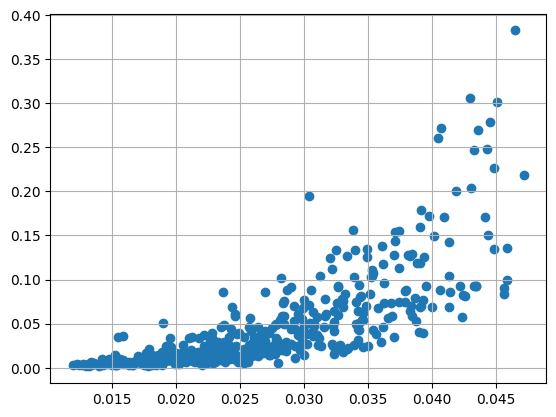

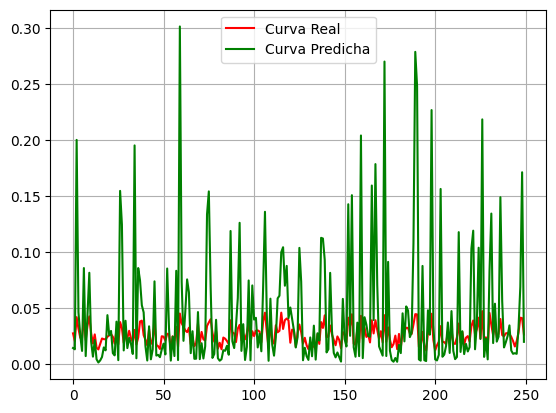

La correlación de los datos es:
           0         1
0  1.000000  0.758245
1  0.758245  1.000000
Las conexiones son:
 [[-0.40407166  0.61508805 -0.44364634 -0.15045083  0.45458943  0.09027208
   0.6255139   0.3171407   0.36371374  0.35257348]
 [ 0.28455156  0.43765512 -0.46135008 -0.29708895 -0.58697283  0.54216784
   0.43680343  0.42716002 -0.40187716  0.38151747]
 [ 0.1755275  -0.23238279 -0.02912752  0.18666478  0.42543292 -0.4408695
   0.43308032 -0.18105999 -0.40617344 -0.22824943]
 [-0.31344482  0.6872923  -0.3255934   0.30204612  0.34246585 -0.31572458
   0.34318832 -0.14427412 -0.29618633  0.09611691]
 [-0.49251193  0.3765765   0.31155762 -0.4124232  -0.04030161  0.327732
   0.44864458  0.1434074  -0.22480555 -0.20948479]
 [ 0.5128259   0.59116536 -0.50227857  0.22860645 -0.14534318  0.22476761
   0.310601    0.09752697  0.1320667  -0.5272884 ]
 [-0.06608343 -0.04446663 -0.08359969  0.02426079  0.3651601   0.29465243
  -0.35005483 -0.04787563 -0.09576631  0.45888352]
 [-0.339

In [18]:
madaline_sig=tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(9,), activation="relu", use_bias=False), #Capa N°1 - 10 regresiones lineales
    tf.keras.layers.Dense(1, activation="sigmoid", use_bias=False)]) #Capa N°2 - Núcleo o Salida

#10 entradas ocultas o regresiones, 9 variables de entrada

madaline_sig.summary()
madaline_sig.load_weights("/content/7. pesos_sigmoid_WACCS.weights.h5")
madaline_sig.compile(optimizer="sgd", loss="mse") #sgd=solve descend gradient
history=madaline_sig.fit(XDn, ydn, epochs=250)    #Recorrer 100 veces la tabla de datos
ydp=madaline_sig.predict(XDn)                     #Pronóstico al final del aprendizaje

#Graficamos el modelo
#Grafica N°1: correlación
plt.figure()
plt.scatter(ydn, ydp, label="Gráfico de correlación")
plt.grid()
plt.show()

#Grafica N°2: Pronóstico
plt.figure()
plt.plot(ydn[0:250,], color="red", label="Curva Real")
plt.plot(ydp[0:250,], color="green", label="Curva Predicha")
plt.legend()
plt.grid()
plt.show()

#Determinamos la correlación
df=pd.DataFrame(np.column_stack((ydn, ydp)))
print("La correlación de los datos es:\n", df.corr())

#Obtenemos las conexiones nerviosas de la red - Efectos independientes - importancia de las variables de entrada
WC=madaline_sig.get_weights() #Estas son las capas
W=WC[0]; C=WC[1] #Capa 1 es W, capa 2 es C
print("Las conexiones son:\n", W) #Conexiones nerviosas (10 regresiones), capa N°0 de 4-10 y la capa N°1 va de 10-1
a=W@C #Producto entre las conexiones, como los W pasan por los C
      #a: son los efectos independientes de las variables sobre la salida
      #cual es más importante que otro, y cual tiene un efecto positivo o negativo sobre la salida
print("Los efectos independientes son:\n", a)

#Como evaluar un nuevo solicitante de crédito
XDo=[[59.29,16.17,83.88,42.66,72.01,6,16.67,3.36,26.87]]
XDon=XDo/np.max(XD, axis=0)
ydpsc=madaline_sig.predict(XDon)
print("El WACCS estimado es:\n", ydpsc)

## **WACC LONG TERM DEBT COST (WACCL)**

2. Se procede con la carga de los datos

In [9]:
#Variables de Salida
yd2=np.array(XDB[["WACC Long Term Debt Cost, (%)"]])
ydn2=yd2 #/np.max(yd2, axis=0) #Variable de salida normalizado

print("Los datos de entrada normalizados son:\n:", XDn)

Los datos de entrada normalizados son:
: [[0.51843136 0.03229427 0.460467   ... 0.33333333 0.9044335  0.5       ]
 [0.71020823 0.58079004 0.88184342 ... 0.23809524 0.62068966 0.28571429]
 [0.12480442 0.01617996 0.17551827 ... 0.         0.07178044 0.33333333]
 ...
 [0.15228211 0.22888628 0.09119239 ... 0.         0.70801612 0.        ]
 [0.370989   0.17887561 0.26019683 ... 0.         0.50246305 0.        ]
 [0.31790275 0.39062044 0.26736792 ... 0.12820513 0.16181014 0.        ]]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100 (400.00 B)

 Trainable params: 100 (400.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2429
Epoch 2/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2226
Epoch 3/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2040
Epoch 4/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1879
Epoch 5/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1714
Epoch 6/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1584  
Epoch 7/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1477 
Epoch 8/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1341 
Epoch 9/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1235 
Epoch 10/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1152 
Epoch 11/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1080 
Epoch 12/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0981 
Epoch 13/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0908 
Epoch 14/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0875 
Epoch 15/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 

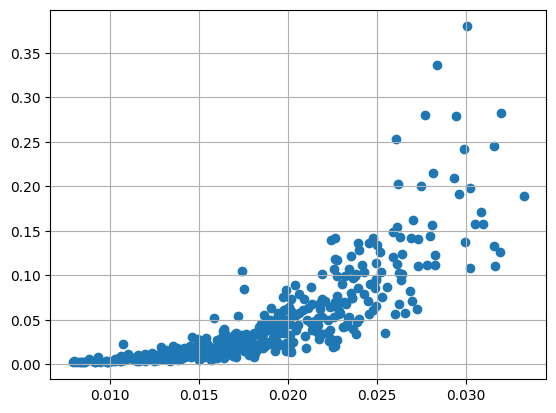

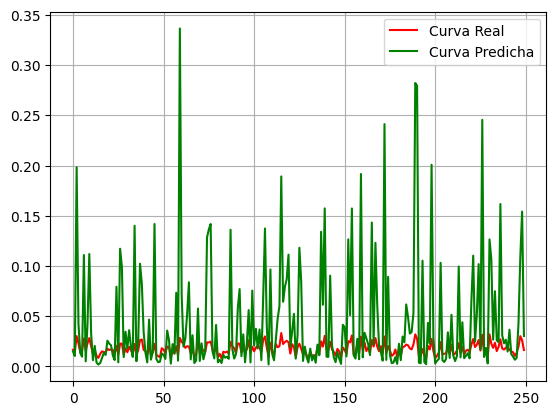

La correlación de los datos es:
           0         1
0  1.000000  0.805195
1  0.805195  1.000000
Las conexiones son:
 [[-0.31370547  0.47970498  0.37375814 -0.20325217  0.14407024  0.11096121
   0.68491346  0.30637926 -0.02646539  0.08910298]
 [-0.3443931  -0.42183635  0.4954263   0.05179291 -0.32014894  0.26776946
  -0.01541816  0.21776457 -0.02394555 -0.4273183 ]
 [ 0.22920315  0.02589     0.4731055  -0.15562703  0.10188119 -0.27469632
   0.61324686  0.25775108 -0.18933249 -0.57704943]
 [ 0.08347426  0.11721109 -0.09236154 -0.3748275   0.22649719 -0.20060503
   0.3464233   0.3052183  -0.04171877  0.13089702]
 [-0.2884462  -0.4610188   0.12642168 -0.02293744 -0.17848644  0.25295568
   0.47301525  0.18212235  0.22616416  0.06802179]
 [-0.39345658 -0.56478673  0.27360588  0.23957288 -0.0342796   0.09593896
   0.93108207  0.24654825  0.30575213  0.1256918 ]
 [-0.06759791  0.14473371 -0.15342003  0.34858283  0.27390122  0.01126065
   0.6766378  -0.02208823  0.2816509   0.33687583]
 [ 0.

In [10]:
madaline_sig=tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(9,), activation="relu", use_bias=False), #Capa N°1 - 10 regresiones lineales
    tf.keras.layers.Dense(1, activation="sigmoid", use_bias=False)]) #Capa N°2 - Núcleo o Salida

#10 entradas ocultas o regresiones, 9 variables de entrada

madaline_sig.summary()
madaline_sig.load_weights("/content/7. pesos_sigmoid_WACCL.weights.h5")
madaline_sig.compile(optimizer="sgd", loss="mse") #sgd=solve descend gradient
history=madaline_sig.fit(XDn, ydn2, epochs=250)    #Recorrer 100 veces la tabla de datos
ydp2=madaline_sig.predict(XDn)                     #Pronóstico al final del aprendizaje

#Graficamos el modelo
#Grafica N°1: correlación
plt.figure()
plt.scatter(ydn2, ydp2, label="Gráfico de correlación")
plt.grid()
plt.show()

#Grafica N°2: Pronóstico
plt.figure()
plt.plot(ydn2[0:250,], color="red", label="Curva Real")
plt.plot(ydp2[0:250,], color="green", label="Curva Predicha")
plt.legend()
plt.grid()
plt.show()

#Determinamos la correlación
df=pd.DataFrame(np.column_stack((ydn2, ydp2)))
print("La correlación de los datos es:\n", df.corr())

#Obtenemos las conexiones nerviosas de la red - Efectos independientes - importancia de las variables de entrada
WC=madaline_sig.get_weights() #Estas son las capas
W=WC[0]; C=WC[1] #Capa 1 es W, capa 2 es C
print("Las conexiones son:\n", W) #Conexiones nerviosas (10 regresiones), capa N°0 de 4-10 y la capa N°1 va de 10-1
a=W@C #Producto entre las conexiones, como los W pasan por los C
      #a: son los efectos independientes de las variables sobre la salida
      #cual es más importante que otro, y cual tiene un efecto positivo o negativo sobre la salida
print("Los efectos independientes son:\n", a)

#Como evaluar un nuevo solicitante de crédito
XDo2=[[59.29,16.17,83.88,42.66,72.01,6,16.67,3.36,26.87]]
XDon2=XDo2/np.max(XD, axis=0)
ydpsc=madaline_sig.predict(XDon2)
print("El WACCL estimado es:\n", ydpsc)

# **Modelo Autoencoders**

In [13]:
#Adjuntamos la base de datos a trabajar
nxl="/content/drive/MyDrive/ANALÍTICA DE NEGOCIOS/7. BGD and Cost of Debt - Feb 2023_Int (2).xlsx"
XDB=pd.read_excel(nxl, sheet_name=1) #usamos la hoja donde está toda la información
XDB.head()

#Variables a seleccionar
XDB=XDB[["ESG Score", "Environmental Pillar Score", "Social Pillar Score", "Governance Pillar Score", "Board Gender Diversity, Percent Score", "Board Size", "Female on Board", "Independent Board Members Score", "Executive Members Gender Diversity, Percent","WACC Short Term Debt Cost, (%)", "WACC Long Term Debt Cost, (%)"]]
XDB=XDB.dropna()

#Variables de Entrada y Salida
XD=np.array(XDB) #misma entrada
XDn=XD/np.max(XD, axis=0) #Variables normalizado
ydna=np.array(XDn) #misma salida


In [16]:
madaline_sig=tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(11,), activation="relu", use_bias=False), #Capa N°1 - 10 regresiones lineales, 5 entradas
    tf.keras.layers.Dense(11, activation="relu", use_bias=False)]) #Capa N°2 - Núcleo o Salida, 5 salidas

madaline_sig.summary()
madaline_sig.load_weights("/content/7. pesos_autoencoder_BGD.weights.h5")
madaline_sig.compile(optimizer="sgd", loss="mse") #sgd=solve descend gradient
history=madaline_sig.fit(XDn, XDn, epochs=250)    #Misma entrada-misma salida por eso en ambos casos son XDn
ydap=madaline_sig.predict(XDn)

#Las correlaciones son las siguientes
df=pd.DataFrame(np.column_stack((XDn, ydap)))
print("La correlación de los datos es:\n", df.corr())
pd.DataFrame(df.corr()).to_excel("Correlaciones.xlsx")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 11)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220 (880.00 B)

 Trainable params: 220 (880.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1177  
Epoch 2/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1146 
Epoch 3/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1108 
Epoch 4/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1073 
Epoch 5/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1075
Epoch 6/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1044 
Epoch 7/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1089 
Epoch 8/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0993 
Epoch 9/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1006 
Epoch 10/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1028 
Epoch 11/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1048 
Epoch 12/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0972 
Epoch 13/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0941
Epoch 14/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0981 
Epoch 15/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - los

# **ANÁLISIS DE RESULTADOS**

## **Descripción de las variables**
Para poder entender de manera clara y completa el modelo que se implementó, debemos entender a qué hace referencia cada una de las variables evaluadas. A continuación, se presentan las variables de entrada que se usaron para entrenar el modelo:

* **ESG Score (ESG):** Representa una métrica compuesta que evalúa el desempeño de la empresa en términos de criterios Ambientales, Sociales y de Gobernanza. Esta puntuación busca captar el compromiso de la empresa con prácticas sostenibles y éticas en esas tres dimensiones

* **Environmental Pillar Score (E):** Mide el compromiso de la empresa con el medio ambiente, incluyendo políticas y prácticas que buscan alinear a la empresa con los Objetivos de Desarrollo Sostenible, especialmente el ODS 5 sobre igualdad de género

* **Social Pillar Score (S):** Evalúa el desempeño de la empresa en aspectos sociales como derechos laborales, relaciones con la comunidad y equidad social dentro de la organización.

* **Governance Pillar Score (G):** Refleja la calidad del gobierno corporativo de la empresa. Incluye aspectos como la independencia del directorio, transparencia en la toma de decisiones y diversidad en el liderazgo.

* **Board Gender Diversity Score (BGDP):** Representa el porcentaje de diversidad de género en la junta directiva. Se vincula directamente con la inclusión de mujeres en roles de liderazgo, lo cual ha demostrado mejorar la reputación de la empresa y reducir su costo de endeudamiento

* **Board Size (BS):** Indica el número total de miembros que componen la junta directiva. Se considera relevante para entender la estructura de gobernanza y cómo puede influir en la toma de decisiones financieras

* **Female on Board (FB):** Representa el número o porcentaje de mujeres que ocupan un asiento en la junta directiva. Esta variable se usa como indicador directo de la presencia femenina en posiciones de poder dentro de la organización

* **Independent Board Members Score (IBM):** Mide el grado de independencia de los miembros del directorio, es decir, cuántos de ellos no tienen vínculos directos con la administración de la empresa.

* **Executive Members Gender Diversity, Percent (EMGD):** Indica el porcentaje de diversidad de género entre los miembros ejecutivos (alta gerencia)

Así mismo, con el fin de obtener los resultados se usaron dos variables de salida, ambas analizadas a partir de las mismas variables de entrada, estas son:

* **WACC short term debt cost (%) (WACCS):** Es el costo promedio ponderado del capital relacionado con las deudas de corto plazo, generalmente de 1 año. Se usa como medida del costo financiero que enfrenta la empresa a corto plazo, y es uno de los outputs modelados por el autoencoder para evaluar el impacto de las variables de género.

* **WACC long term debt cost (%) (WACCL):** Representa el costo promedio ponderado del capital relacionado con deudas de largo plazo, mayores a un año. Es una métrica fundamental para analizar la sostenibilidad financiera de la empresa en el tiempo y cómo esta se ve afectada por variables organizacionales.

## **Análisis de resultados**
Para este reto se emplearon dos tipos de modelos: un modelo de red neuronal tipo Madaline para estimar el costo de capital en el corto (WACCS) y largo plazo (WACCL), y un modelo autoencoder para estudiar las correlaciones entre las variables de equidad de género y los costos de capital.

El modelo Madaline utilizado para estimar el **WACC Short Term Debt Cost (WACCS)** fue estructurado con una capa oculta de 10 neuronas y una función de activación sigmoide en la salida. El modelo fue entrenado por 250 iteraciones con descenso de gradiente. Las variables Social Pillar Score con 0,53 y female on board con 0,38, fueron las que tuvieron mayor peso en la reducción del costo de capital de corto plazo. Pero destacando social pillar con el mayor puntaje sobre todas las variables, indicando su importancia e influencia en la decisión final del costo de capital a corto plazo. Por el contrario, variables como ESG Score con -1,77 e Independent Board Member Score con -1,83% mostraron efectos negativos o más débiles sobre el WACCS. El valor estimado para una nueva empresa con características dadas (XDo) fue de aproximadamente 0.048, lo que representa un costo de capital relativamente bajo gracias a sus buenos indicadores ESG y de diversidad.

Se replicó el mismo modelo para estimar el **WACC Long Term Debt Cost (WACCL)**. Al igual que en el modelo anterior, se analizaron los efectos independientes, se consideraron las mismas variables de entrada y la salida fue cambiada por el valor a largo plazo. En este caso, el social pillar score con 1.46, junto con board size con -1.81, los que mostraron una mayor influencia en la reducción del costo de deuda a largo plazo, teniendo un mayo impacto sobre el resultado de dicha variable. Sin embargo, el resto de las variables, pero con  mayor influencia de environmental pillar score con -0.65 y board gender diversity score -0.84 tienen un impacto negativo en la reducción del costo de deuda a largo plazo. El WACCL estimado para la misma empresa fue de aproximadamente 0.0188, ligeramente menor al de corto plazo.

Finalmente, se estableció el **modelo autoencoder**, este se construyó a partir de 11 neuronas de entrada (correspondientes a las nueve variables de entrada más WACCS y WACCL), una capa oculta con 10 neuronas y una capa de salida que replica exactamente las variables de entrada.

A partir del modelo entrenado, se obtuvo un documento de correlación entre las variables. Entre las correlaciones que más se destacan, se encuentran: la alta relación entre el puntaje ESG general y governande Pillar Score que presentan un 94% de correlación, lo cual evidencia que el desempeño del gobierno de la empresa tiene un fuerte peso en su evaluación ESG total. Asimismo, la correlación entre la diversidad de género en la junta directiva (BGDP) y board size fue significativa, del 97%, indicando que las empresas que promueven la inclusión de género en sus órganos de gobierno tienden a replicar esa misma política a nivel ejecutivo.

En cuanto al costo de capital, se observaron correlaciones negativas entre las variables de equidad y gobernanza y los valores de WACC, en el largo plazo. Específicamente, el Governance Pillar Score (G) y la diversidad ejecutiva (EMGD) mostraron una asociación inversa con el WACCL, lo que sugiere que una mejor gobernanza y una mayor equidad en los niveles directivos están asociadas con un menor costo de deuda a largo plazo. Del mismo modo, variables como el BGDP y el ESG Score también se correlacionaron negativamente con el WACCL, consolidando la idea de que una estructura organizacional más equitativa y sostenible no solo es socialmente deseable, sino que también conlleva beneficios financieros.

En conclusión, el análisis con los modelos Madaline y Autoencoder permitió identificar las variables más influyentes sobre el costo de capital, destacando la importancia de la equidad de género en juntas y equipos ejecutivos, promoviendo los roles de liderazgo femenino en empresas para así reducir el costo no solo a corto pero también a largo plazo. Así mismo, se pudo confirmar que los modelos entrenados son eficaces y buenos para establecer predicciones, es importante notar que si bien las variables tienen diferentes efectos según el tiempo de la deuda (corto o largo plazo), aquellas relacionadas con diversidad, equidad de género, gobernanza y sostenibilidad son considerablemente relevantes para ambos modelos.